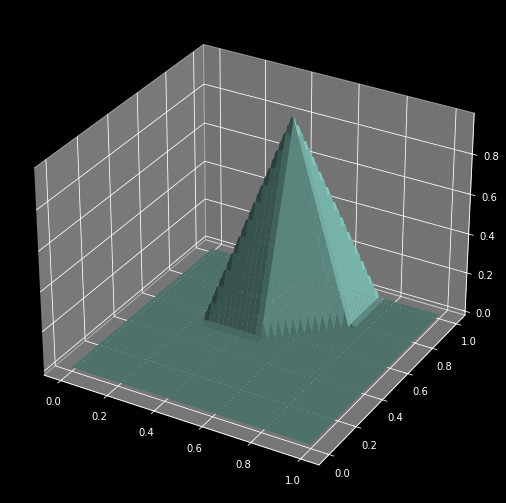

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
N=5
ad = np.zeros((N,N))

def feasible(val,duoi, tren):
    return ((val >= duoi) and (val <=tren) )
dj= [0,1,1,0,-1,-1]
di =[1,1,0,-1,-1,0]
adj = ad.tolist()

for i in range(0,N):
    for j in range(0,N):
        adj[i][j] = []
        for k in range(0,len(di)):
            ke_i = i + di[k]
            ke_j = j + dj[k]
            if(feasible(ke_i,0,N-1) and feasible(ke_j,0,N-1)):
                adj[i][j].append([ke_i,ke_j])


def det(x_val,y_val,x1,y1,x2,y2):
    return (x1-x_val)*(y2-y_val) - (x2-x_val)*(y1-y_val)
def check_in(x1,y1,x2,y2,x3,y3,val_x,val_y):
    d1 = det(val_x,val_y,x1,y1,x2,y2)
    d2 = det(val_x,val_y,x2,y2,x3,y3)
    d3 = det(val_x,val_y,x3,y3,x1,y1)
    thuan = (d1<0 or d2<0 or d3<0)
    nguoc = (d1>0 or d2>0 or d3>0)
    return not(thuan and nguoc)
def pyramid(x1,y1,x2,y2,x3,y3,val_x,val_y):
    if(not check_in(x1,y1,x2,y2,x3,y3,val_x,val_y)):
        return 0
    A = np.array([[x1,y1,1],[x2,y2,1],[x3,y3,1] ])
    b = np.array([1,0,0])
    [a,b,c] = np.linalg.solve(A,b)
    return a*val_x+b*val_y+c
# Creating dataset
M=100
x = np.linspace(0,1,N)
y = x

x_matrix = np.outer(np.linspace(0,1, M), np.ones(M))
y_matrix = x_matrix.copy().T # transpose
z_matrix = np.zeros((M,M))

i0= 2
j0=3
s = np.shape(adj[i0][j0])[0]

for k in range(0, s):
    x1= x[i0]
    y1 = y[j0]
    for i in range(0,M):
        for j in range(0,M):
            i2 = adj[i0][j0][k][0]
            j2 = adj[i0][j0][k][1]
            i3 = adj[i0][j0][ (k+1)%s][0] 
            j3 = adj[i0][j0][(k+1)%s][1]
            z_matrix[i][j] += pyramid(x1,y1,x[i2],y[j2],x[i3],y[j3],x_matrix[i][j],y_matrix[i][j])
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
 
# Creating plot
ax.plot_surface(x_matrix, y_matrix, z_matrix)
 
# show plot
plt.show()


In [ ]:
len(di)

6